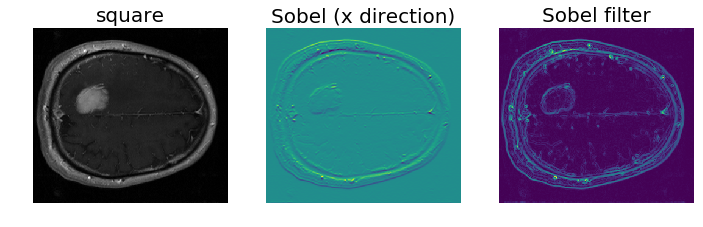

In [15]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
im = mri_data[23]
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

In [14]:
# Get image data w/ nibabel
import numpy as np
import nibabel as nib
def get_data(filename):
    img = nib.load(filename)
    return img.get_data()
def scale(array):
    return (array-np.min(array))/(np.max(array) - np.min(array))    
mri_data = scale(get_data('../data/case_001_2.nii.gz')).transpose((2,0,1))
labelled_data = get_data('../data/case_001_labels.nii.gz').transpose((2,0,1))

In [ ]:
from keras.models import load_model
from keras import backend as K
K.set_image_dim_ordering('th')

model = load_model('vgg16.h5')